<b>Code Imports</b>

In [321]:
%matplotlib inline

import numpy as num
import matplotlib.pyplot as plt
import ipywidgets as widgets

<b>Lorenz Equations</b>
$$\frac{dx}{dt}=\sigma(y-x)$$
$$\frac{dy}{dt}=x(\rho - z) - y$$
$$\frac{dz}{dt}=xy-\beta z$$


<b>Lorenz System - RK4 Approximation</b> 

In [322]:
ρ = ρ_v.value; σ = σ_v.value; β = β_v.value
# Lorenz Equations
Lx = lambda x,y,z: σ*(y - x)
Ly = lambda x,y,z: x*(ρ- z) - y
Lz = lambda x,y,z: x*y - β*z


In [323]:
def L(ω):
    # ω is an array containing values approximated values for x, y, z
    return Lx(ω[0],ω[1],ω[2]), Ly(ω[0],ω[1],ω[2]), Lz(ω[0],ω[1],ω[2])



# Specialized RK4 for Lorenz Equations

def L_RK4(a, b, α, N):
# INPUTS: Bounds a and b, initial values α, and sub-intervals N
# OUTPUTS: approximation of the functions fx, fy, fz
    h = (b-a)/N
    t = a
    ω = α
    fx = [α[0]]
    fy = [α[1]]
    fz = [α[2]]
    
    for j in range(1, N+1):
        # Initialize for use of k_Mult function
        
        k1x = h*Lx(ω[0],ω[1],ω[2])
        k1y = h*Ly(ω[0],ω[1],ω[2])
        k1z = h*Lz(ω[0],ω[1],ω[2])
        
        k2x = h*Lx(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
        k2y = h*Ly(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
        k2z = h*Lz(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
    
        k3x = h*Lx(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        k3y = h*Ly(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        k3z = h*Lz(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        
        k4x = h*Lx(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        k4y = h*Ly(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        k4z = h*Lz(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        # Print out respective k values
        
        # Recalculate ω for next iteration
        ω[0] = ω[0] + (k1x + 2*k2x + 2*k3x + k4x)/6;
        ω[1] = ω[1] + (k1y + 2*k2y + 2*k3y + k4y)/6;
        ω[2] = ω[2] + (k1z + 2*k2z + 2*k3z + k4z)/6;
        
        fx.append(ω[0])
        fy.append(ω[1])
        fz.append(ω[2])
        
    return fx, fy, fz


In [324]:
# Lorenz Values, modify values to modify system
# NOTE: Lorenz values are typically positive

ρ_v = widgets.FloatText(min=0, max=150, description='ρ:')
σ_v = widgets.FloatText(min=0, max=50, description='σ:')
β_v = widgets.FloatText(min=0, max=10, description='β:')

# range of t values
a = 0; b = 20
# initial value for IVPs
α = [1,1,1]
# number of subintervals used to approximate equations
N = 2000
Y = L_RK4(a,b,α,N)

<b>Creation of 3D Plot</b>

FloatText(value=0.0, description='ρ:')

FloatText(value=0.0, description='σ:')

FloatText(value=0.0, description='β:')

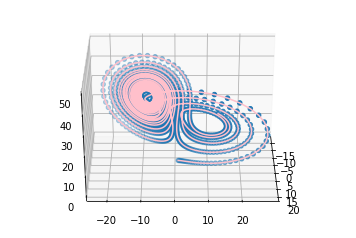

In [325]:
fig = plt.figure();
ax = plt.axes(projection='3d');
# Change degrees of rotation:
ax.view_init(30,0)

ax.plot3D(Y[0],Y[1],Y[2], 'pink');
ax.scatter3D(Y[0], Y[1], Y[2]);

display(ρ_v, σ_v, β_v)

In [326]:
# 10/16/2018 - Modified k_Mult; removed h from Ω calculation into return statements
# 10/18/2018 - Modified L_RK4; allocated x(t), y(t), and z(t) seperately to produce accurate results
# 10/29/2018 - Modified L_RK4 to original form, now producing expected results
# 11/01/2018 - Added FloatBoxes from PyWidget to easily modify results of RK4 for Lorenz equations 